<a href="https://colab.research.google.com/github/nssuryawanshi10/Data-Science-Uplift-Project---Python-DS-File-Handling-Assignment/blob/main/Spotify_EDA_Uplift_Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [2]:
!kaggle datasets download -d yamaerenay/spotify-dataset-19212020-160k-tracks

 95% 185M/195M [00:01<00:00, 163MB/s]
100% 195M/195M [00:01<00:00, 167MB/s]


In [3]:
from zipfile import ZipFile
file_name = 'spotify-dataset-19212020-160k-tracks.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


# **<font color='orange'>Importing necessary libraries</font>**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [5]:
artists = pd.read_csv('artists.csv')
artist_data = pd.read_csv('data_by_artist_o.csv')
genres_data = pd.read_csv('data_by_genres_o.csv')
year_data = pd.read_csv('data_by_year_o.csv')
data = pd.read_csv('data_o.csv')
tracks = pd.read_csv('tracks.csv')

In [6]:
artists.head()

id  ...  popularity
0  0DheY5irMjBUeLybbCUEZ2  ...           0
1  0DlhY15l3wsrnlfGio2bjU  ...           0
2  0DmRESX2JknGPQyO15yxg7  ...           0
3  0DmhnbHjm1qw6NCYPeZNgJ  ...           0
4  0Dn11fWM7vHQ3rinvWEl4E  ...           0

[5 rows x 5 columns]

In [7]:
artist_data.head()

genres  ... count
0  ['show tunes']  ...     9
1              []  ...    26
2              []  ...     7
3              []  ...    27
4              []  ...     7

[5 rows x 16 columns]

In [8]:
genres_data.head()

mode                  genres  acousticness  ...   valence  popularity  key
0     1  21st century classical      0.979333  ...  0.103783   27.833333    6
1     1                   432hz      0.494780  ...  0.221750   52.500000    5
2     1                   8-bit      0.762000  ...  0.975000   48.000000    7
3     1                      []      0.651417  ...  0.513604   20.859882    7
4     1              a cappella      0.676557  ...  0.448249   45.820071    7

[5 rows x 14 columns]

In [9]:
year_data.head()

mode  year  acousticness  ...   valence  popularity  key
0     1  1921      0.886896  ...  0.379327    0.653333    2
1     1  1922      0.938592  ...  0.535549    0.140845   10
2     1  1923      0.957247  ...  0.625492    5.389189    0
3     1  1924      0.940200  ...  0.663725    0.661017   10
4     1  1925      0.962607  ...  0.621929    2.604317    5

[5 rows x 14 columns]

In [10]:
data.head()

valence  year  acousticness  ... release_date  speechiness    tempo
0   0.0594  1921         0.982  ...         1921       0.0366   80.954
1   0.9630  1921         0.732  ...         1921       0.4150   60.936
2   0.0394  1921         0.961  ...         1921       0.0339  110.339
3   0.1650  1921         0.967  ...         1921       0.0354  100.109
4   0.2530  1921         0.957  ...         1921       0.0380  101.665

[5 rows x 19 columns]

In [11]:
tracks.head()

id  ... time_signature
0  35iwgR4jXetI318WEWsa1Q  ...              3
1  021ht4sdgPcrDgSk7JTbKY  ...              1
2  07A5yehtSnoedViJAZkNnc  ...              5
3  08FmqUhxtyLTn6pAh6bk45  ...              3
4  08y9GfoqCWfOGsKdwojr5e  ...              4

[5 rows x 20 columns]

# **<font color='orange'>Cleaning the dataframe</font>**

In [12]:
artists = artists.drop(columns=['genres','popularity'])
artists.shape

(1104349, 3)

In [13]:
artists.isnull().sum()

id            0
followers    13
name          0
dtype: int64

In [14]:
artists = artists.dropna(axis=1, how="any", thresh=None, subset=None, inplace=False)

In [15]:
artists = artists.drop_duplicates()
artists.shape

(1104349, 2)

In [16]:
artist_data = artist_data.drop(columns=['key','mode'])
artist_data.shape

(28680, 14)

In [17]:
artist_data.isnull().sum()

genres              0
artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
count               0
dtype: int64

In [18]:
genres_data = genres_data.drop(columns=['mode','key'])
genres_data.shape

(2973, 12)

In [19]:
genres_data.isnull().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [20]:
year_data = year_data.drop(columns=['mode','key'])
year_data.shape

(100, 12)

In [21]:
year_data.isnull().sum()

year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [22]:
data = data.drop(columns=['mode','key','explicit'])
data.shape

(170653, 16)

In [23]:
data.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [24]:
tracks = tracks.drop(columns=['explicit','key','mode','popularity'])
tracks.shape

(586672, 16)

In [25]:
tracks.isnull().sum()

id                   0
name                71
duration_ms          0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
loudness             0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [26]:
# Drop the column having null values

tracks = tracks.dropna(axis=1, how="any", thresh=None, subset=None, inplace=False)

In [27]:
tracks.shape

(586672, 15)

# **<font color='orange'>Exploratory Data Analysis(EDA)</font>**

In [28]:
# Most popular songs on spotify from 1921-2020.

print("Top 10 popular songs are :")
data[['name','artists','release_date','popularity']].sort_values(by='popularity',ascending=False)[:10]

Top 10 popular songs are :


name  ... popularity
19611                                   Dakiti  ...        100
19606                   Mood (feat. iann dior)  ...         99
19618                                 Dynamite  ...         97
19608          WAP (feat. Megan Thee Stallion)  ...         96
19610                                positions  ...         96
19612                  What You Know Bout Love  ...         96
19616                          Blinding Lights  ...         96
19607  For The Night (feat. Lil Baby & DaBaby)  ...         95
19615           Holy (feat. Chance The Rapper)  ...         95
19620               Lonely (with benny blanco)  ...         95

[10 rows x 4 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

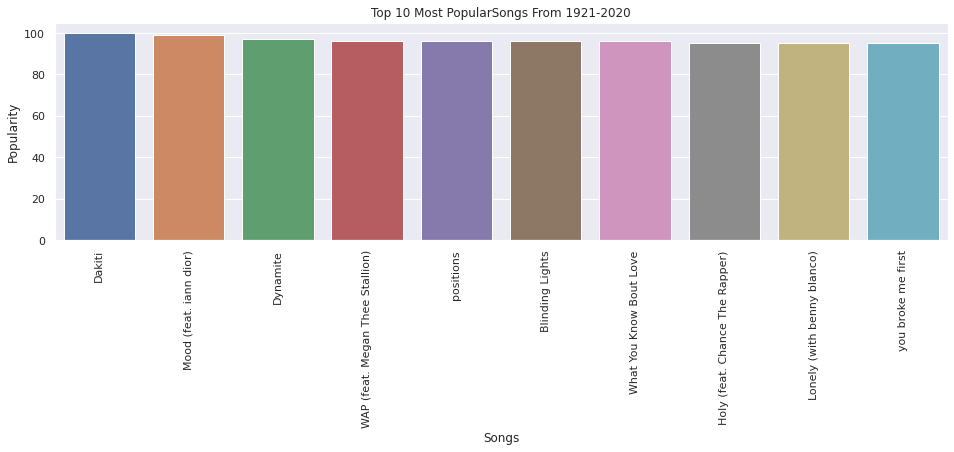

In [29]:
plt.figure(figsize=(16,4))
sns.set(style="darkgrid")
x = data.groupby('name')['popularity'].max().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index,x)
ax.set_title("Top 10 Most PopularSongs From 1921-2020")
ax.set_xlabel('Songs')
ax.set_ylabel('Popularity')
plt.xticks(rotation=90)

#### **<font color='green'>So from the above analysis we can say that 'Dakiti' by 'Bad Bunny' & 'Jhay Cortez' is till now the most popular song based on the popularity rate.</font>**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

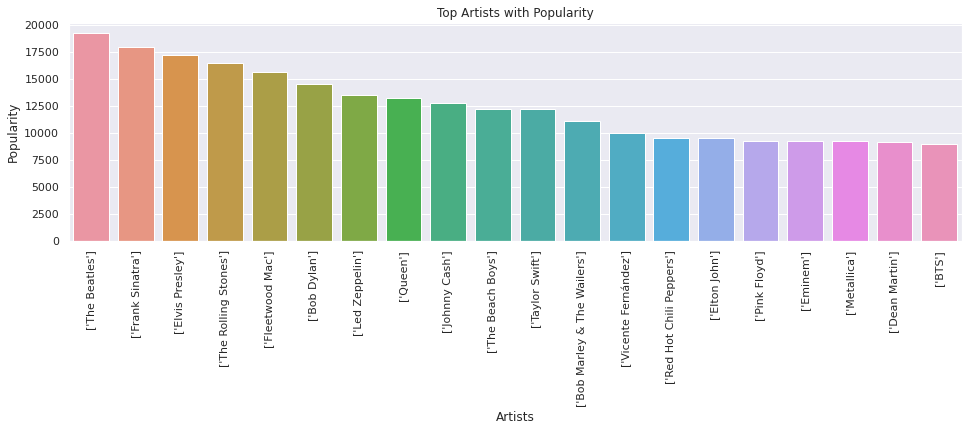

In [30]:
# Singer which is most popular on spotify

plt.figure(figsize=(16,4))
sns.set(style="darkgrid")
x = data.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index,x)
ax.set_title("Top Artists with Popularity")
ax.set_xlabel('Artists')
ax.set_ylabel('Popularity')
plt.xticks(rotation=90)

#### **<font color='green'>'The Beatles' is the most popular between 1921-2020.</font>**

In [31]:
# Singer which sang most number of songs between 1921-2020:

songs_count =data.artists.value_counts()[:10]
print(songs_count)

['Эрнест Хемингуэй']      1211
['Эрих Мария Ремарк']     1068
['Francisco Canaro']       942
['Frank Sinatra']          630
['Ignacio Corsini']        628
['Elvis Presley']          504
['Johnny Cash']            484
['Bob Dylan']              474
['The Rolling Stones']     471
['The Beach Boys']         455
Name: artists, dtype: int64


#### **<font color='green'>'Эрнест Хемингуэй' has sang 1211 songs which is the most till now followed by 1068 songs of 'Эрих Мария Ремарк'.</font>**

In [32]:
# Singer having highest total duration of songs:

x = pd.DataFrame(data.groupby('artists')['duration_ms'].sum())
x.sort_values('duration_ms').tail().reset_index()

artists  duration_ms
0  ['Эрих Мария Ремарк']    129242082
1   ['Эрнест Хемингуэй']    140399661
2        ['Miles Davis']    158486036
3   ['Francisco Canaro']    164834854
4        ['Umm Kulthum']    243068305

#### **<font color='green'>'Umm Kulthum' has the highest total duration of songs.</font>**

In [33]:
# Most successful year based on popularity rating:

plr_yr = data.groupby('year')['popularity'].sum().sort_values()
print(plr_yr)

year
1922        10
1921        98
1924       156
1931       165
1929       324
         ...  
2015    111927
2017    126021
2019    127185
2020    130533
2018    133112
Name: popularity, Length: 100, dtype: int64


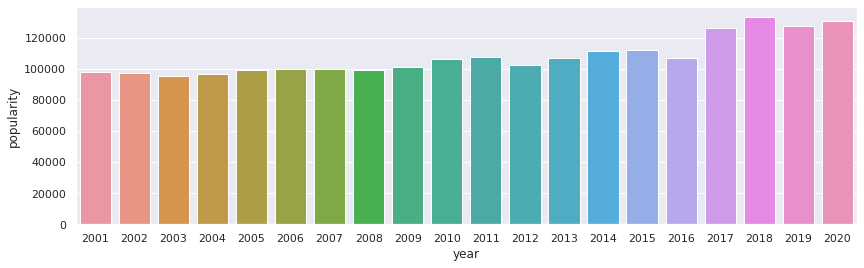

In [34]:
plr_yr =data.groupby('year').agg({'popularity': 'sum'})
plt.figure(figsize=(14,4))
sns.barplot(x=plr_yr.index[-20:], y = plr_yr.popularity[-20:], data=plr_yr)

#### **<font color='green'>2018 was the most popular year based on popularity rating.</font>**

In [35]:
# Average duration of songs which has changed over the years.

data['duration_min'] = data['duration_ms']/60000
grouped_music = data['duration_min'].groupby(data['year']).describe()
grouped_music

count      mean       std  ...       50%       75%        max
year                              ...                               
1921   150.0  4.342286  2.629113  ...  3.144583  5.303654  13.861117
1922    71.0  2.757829  0.544967  ...  2.800000  3.017550   5.167883
1923   185.0  2.965706  0.488769  ...  2.994450  3.227783   6.912483
1924   236.0  3.184112  1.505693  ...  2.896442  3.126113  17.183567
1925   278.0  3.083115  0.858392  ...  3.010108  3.242504  13.714283
...      ...       ...       ...  ...       ...       ...        ...
2016  1797.0  3.689942  1.109705  ...  3.599333  4.130667  10.859283
2017  1992.0  3.518595  0.887663  ...  3.484275  3.940783   9.509000
2018  2103.0  3.433350  0.943605  ...  3.368383  3.807500   9.323533
2019  1949.0  3.350413  0.946246  ...  3.260617  3.719550  12.209233
2020  2030.0  3.228807  0.779311  ...  3.176467  3.599883  10.770650

[100 rows x 8 columns]

In [36]:
avg_runtime_by_year = grouped_music['mean']
avg_runtime_min = grouped_music['mean'] - grouped_music['std']
avg_runtime_max = grouped_music['mean'] + grouped_music['std']

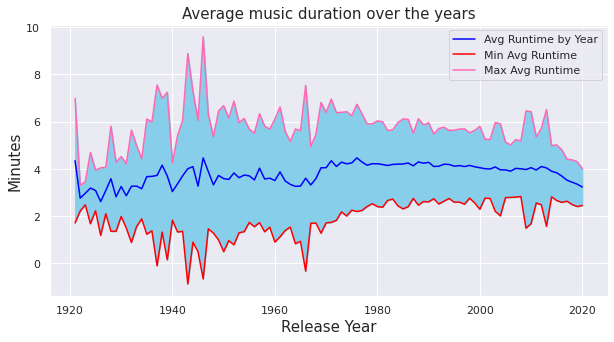

In [37]:
fig, x = plt.subplots(figsize=(10,5))
x.plot(avg_runtime_by_year, color = 'blue',label = 'Avg Runtime by Year')
x.plot(avg_runtime_min, color = 'red',label = 'Min Avg Runtime')
x.plot(avg_runtime_max, color = 'hotpink', label = 'Max Avg Runtime')
x.fill_between(grouped_music.index, avg_runtime_min, avg_runtime_max, color='skyblue')
x.set_title('Average music duration over the years', fontsize=15)
plt.legend()
x.set_xlabel('Release Year', fontsize=15)
x.set_ylabel('Minutes', fontsize=15)
plt.show()

#### **<font color='green'>We can see that the mean duration is between 3-4 minutes & it has been preety much same during 1921-2020.</font>**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

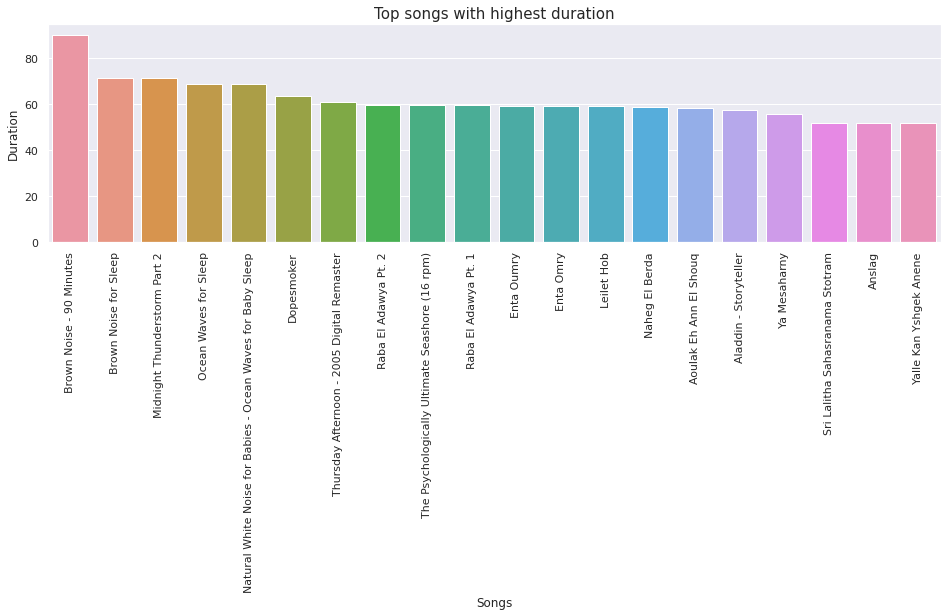

In [38]:
# Songs with highest & lowest duration.

plt.figure(figsize=(16,4))
sns.set(style="darkgrid")
x = data.groupby('name')['duration_min'].max().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title("Top songs with highest duration", fontsize=15)
ax.set_xlabel('Songs')
ax.set_ylabel('Duration')
plt.xticks(rotation=90)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

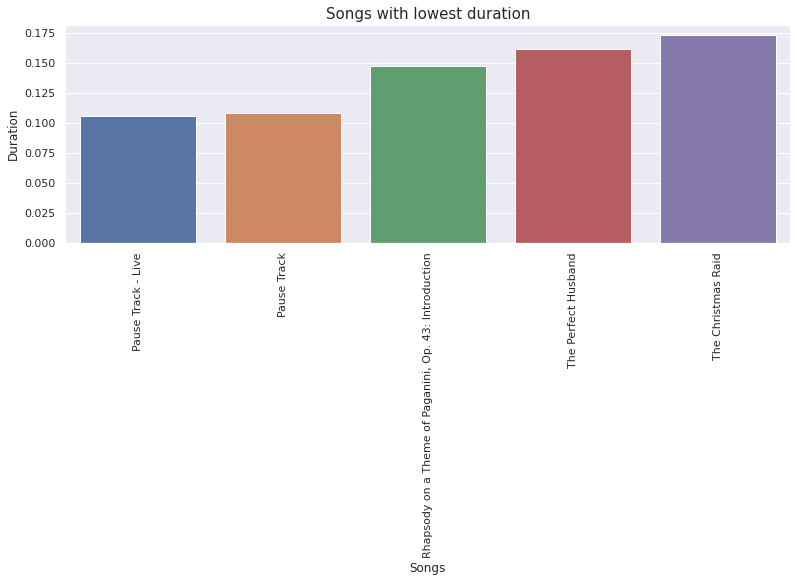

In [39]:
# Songs with lowest duration.

plt.figure(figsize=(13,4))
sns.set(style="darkgrid")
x = data.groupby('name')['duration_min'].max().sort_values(ascending=True).head(5)
ax = sns.barplot(x.index, x)
ax.set_title("Songs with lowest duration", fontsize=15)
ax.set_xlabel("Songs")
ax.set_ylabel("Duration")
plt.xticks(rotation=90)

#### **<font color='green'>'Brown Noise' is the song with a duration 90 minutes which is the highest & 'Pause Track' is the song with a duration around 6 seconds which is the lowest </font>**

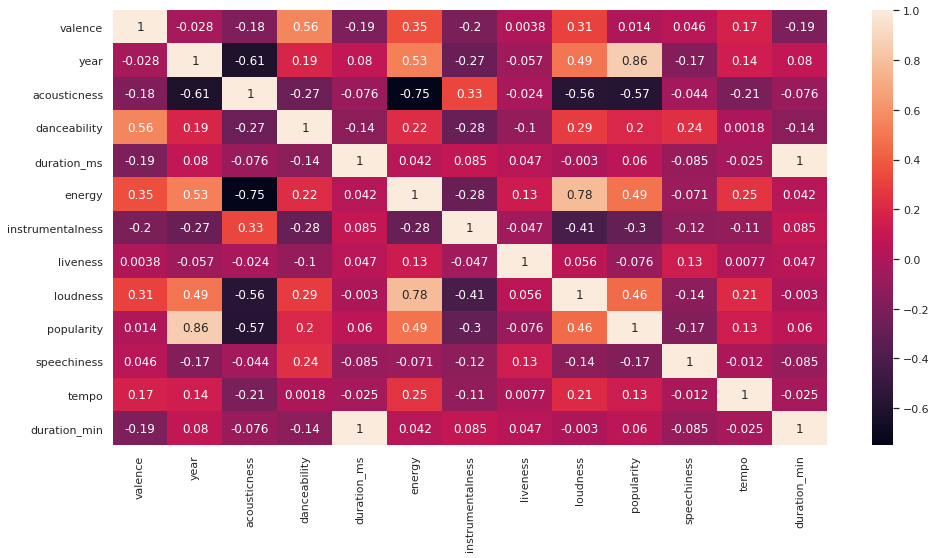

In [40]:
# Attributes of the dataset which are connected to each other.

plt.figure(figsize=(16,8))
sns.set(style='whitegrid')
corr = data.corr()
sns.heatmap(corr,annot=True)

#### **<font color='black'>From the above heatmap it is clearly visible that: </font>**


##### **<font color='green'>i. Energy is positively co-related with Loudness. </font>**

##### **<font color='green'>ii. Acousticness is negatively co-related with Loudness. </font>**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(20.200000000000003, 0.5, 'Count')

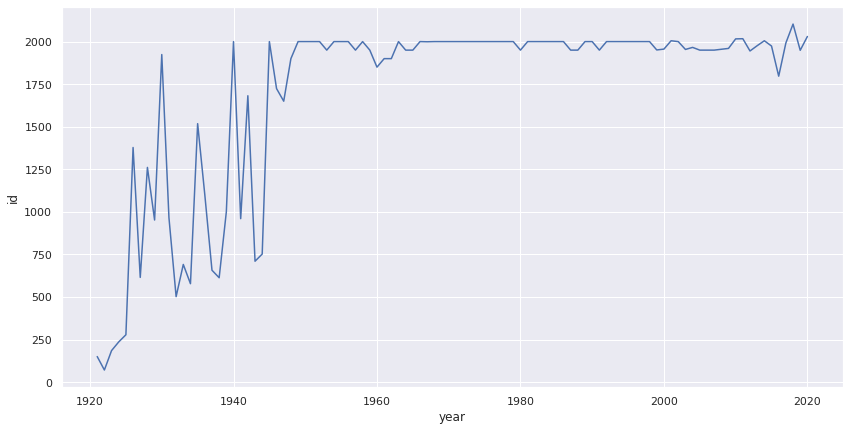

In [41]:
# No.of songs added every year on spotify.

plt.figure(figsize=(14,7))
sns.set(style='darkgrid')
x = data.groupby('year')['id'].count()
axis = sns.lineplot(x.index, x)
ax.set_title("Number of tracks added", fontsize=15)
ax.set_xlabel('Year')
ax.set_ylabel('Count')


### **How danceability of songs has changed over the years**

Text(0, 0.5, 'Count')

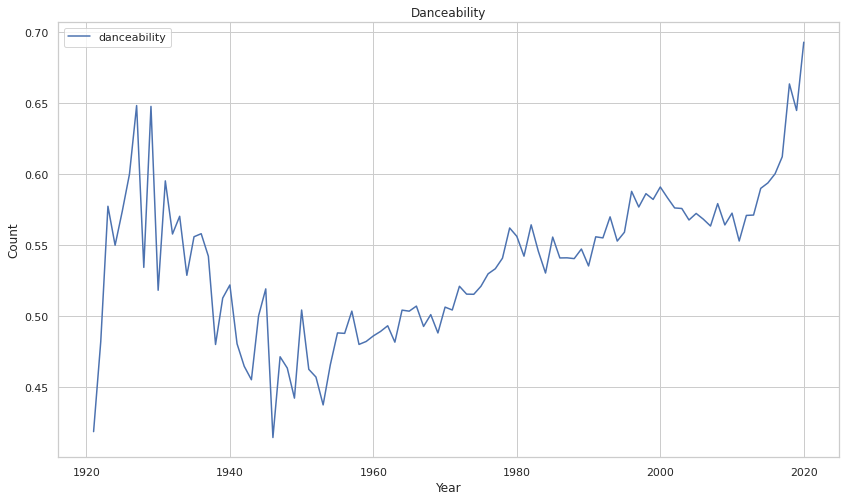

In [42]:
# Most danceable song on spotify.

plt.figure(figsize=(14,8))
sns.set(style='whitegrid')
columns = ['danceability']
for col in columns:
  x = data.groupby('year')[col].mean()
  ax = sns.lineplot(x = x.index, y = x, label = col)
ax.set_title("Danceability")
ax.set_xlabel("Year")
ax.set_ylabel("Count")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

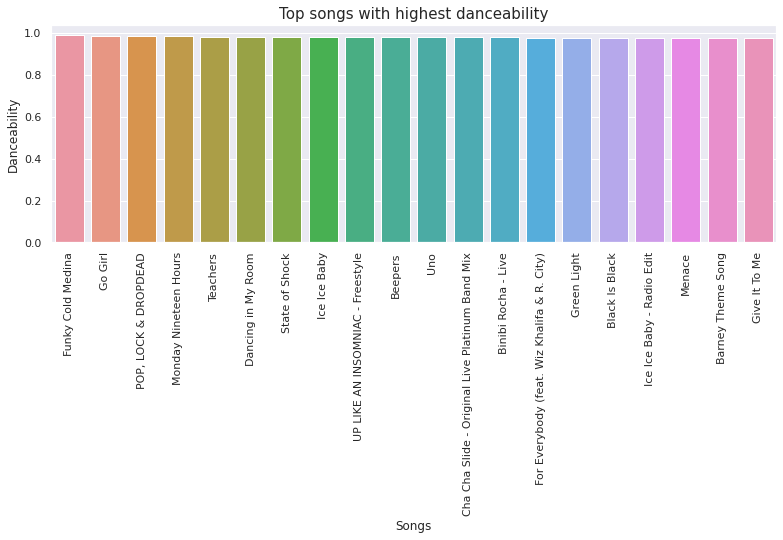

In [43]:
# Most Danceable Song.

plt.figure(figsize=(13,4))
sns.set(style="darkgrid")
x = data.groupby('name')['danceability'].max().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title("Top songs with highest danceability", fontsize=15)
ax.set_xlabel("Songs")
ax.set_ylabel("Danceability")
plt.xticks(rotation=90)

In [44]:
print(data.artists[data['danceability']==data['danceability'].max()])

13489    ['Tone-Loc']
Name: artists, dtype: object


#### **<font color='green'>'Funky Cold Medina' by 'Tone-Loc' is the most danceable song on spotify.</font>**

## **How the tempo of songs has changed over the years?**

Text(0, 0.5, 'Count')

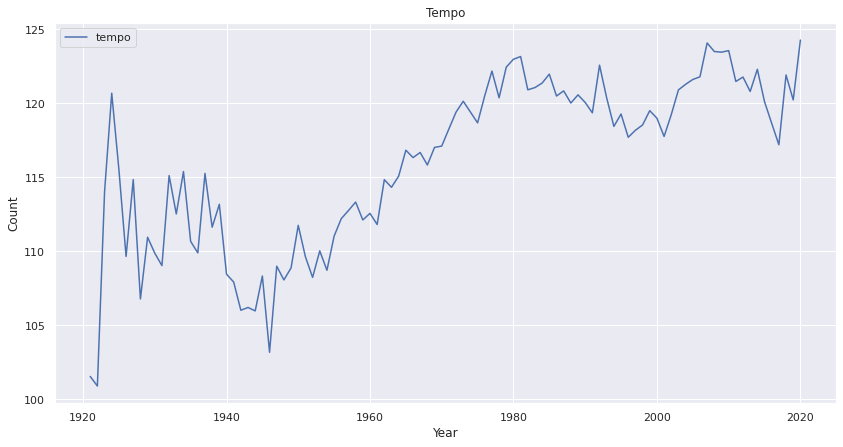

In [45]:
# Song with highest tempo.

plt.figure(figsize=(14,7))
sns.set(style='darkgrid')
columns = ['tempo']
for col in columns:
  x = data.groupby('year')[col].mean()
  ax = sns.lineplot(x = x.index, y = x, label = col)
ax.set_title("Tempo")
ax.set_xlabel('Year')
ax.set_ylabel('Count')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

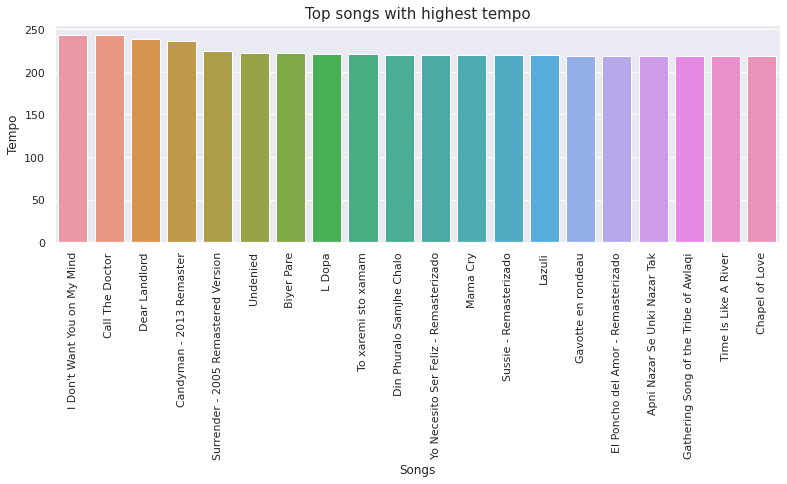

In [46]:
plt.figure(figsize=(13,4))
sns.set(style="darkgrid")
x = data.groupby('name')['tempo'].max().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title("Top songs with highest tempo", fontsize=15)
ax.set_xlabel("Songs")
ax.set_ylabel("Tempo")
plt.xticks(rotation=90)

In [47]:
print(data.artists[data['tempo']==data['tempo'].max()])

82884    ['Bill Withers']
Name: artists, dtype: object


#### **<font color='green'>From the above analysis we can say that tempo has gradually increased from 1950's & "I Don't Want on My Mind" by "Bill Withers" is the song with highest tempo.</font>**

## **How the Loudness of songs has changed over the years?**

Text(0, 0.5, 'Count')

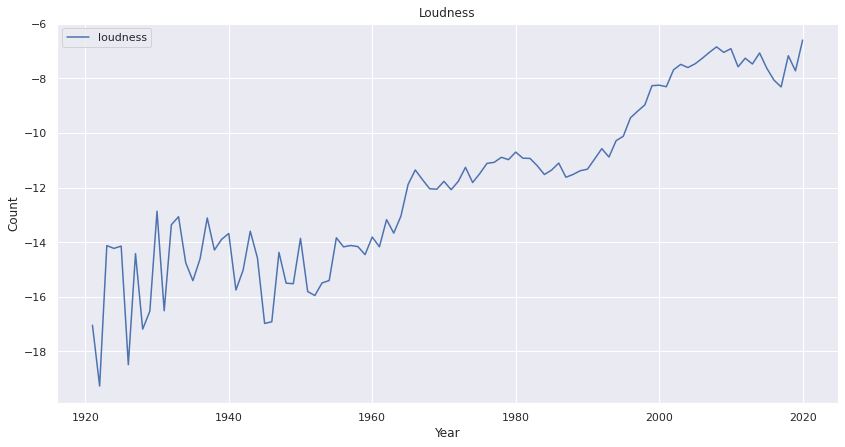

In [48]:
# Loudest Song On Spotify.

plt.figure(figsize=(14,7))
sns.set(style="darkgrid")
columns = ["loudness"]
for col in columns:
  x = data.groupby('year')[col].mean()
  ax = sns.lineplot(x = x.index, y = x, label = col)
ax.set_title("Loudness")
ax.set_xlabel('Year')
ax.set_ylabel('Count')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

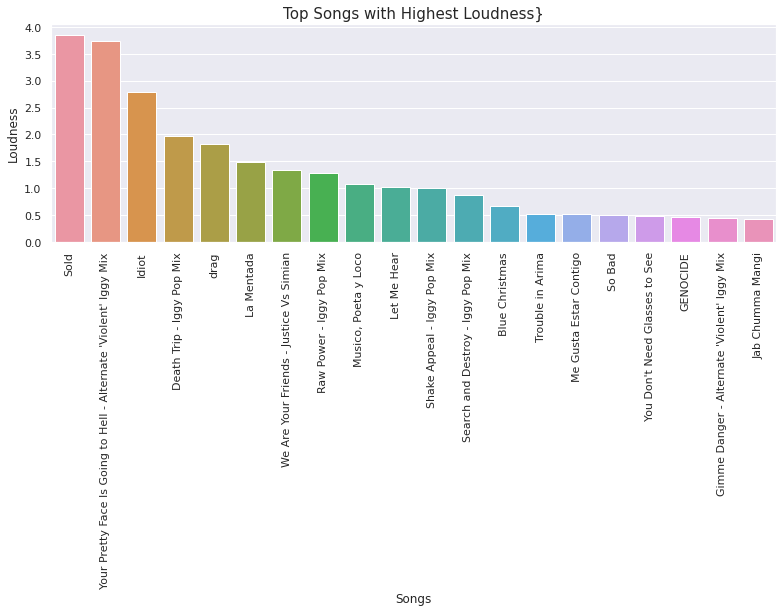

In [49]:
plt.figure(figsize=(13,4))
sns.set(style="darkgrid")
x = data.groupby('name')['loudness'].max().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title("Top Songs with Highest Loudness}", fontsize=15)
ax.set_xlabel("Songs")
ax.set_ylabel("Loudness")
plt.xticks(rotation=90)

In [50]:
print(data.artists[data['loudness']==data['loudness'].max()])

40413    ['Apocolothoth']
Name: artists, dtype: object


#### **<font color='green'>So it is clearly visible that loudness has constantly increased over the years & 'Sold' by 'Apocolothoth' is the loudest song on Spotify.</font>**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Energy')

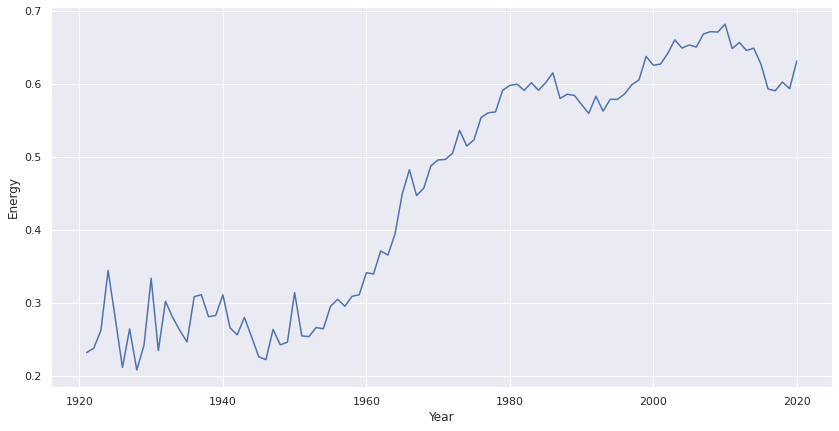

In [51]:
# Most Energetic Song On Spotify.

plt.figure(figsize=(14,7))

x = data.groupby('year')['energy'].mean()
ax = sns.lineplot(x.index, x)
ax.set_xlabel('Year')
ax.set_ylabel('Energy')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

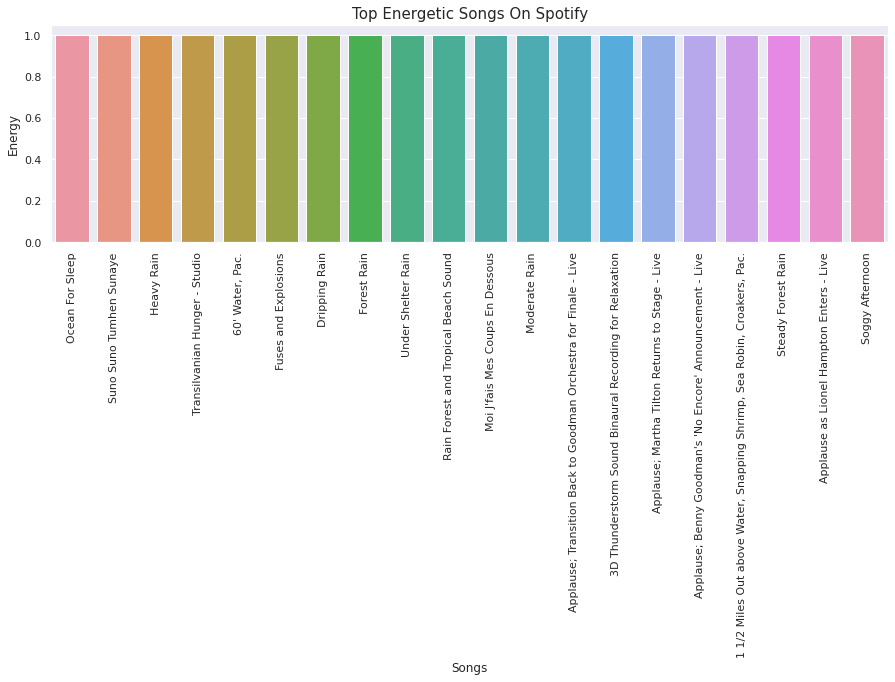

In [52]:
plt.figure(figsize=(15,4))
sns.set(style="darkgrid")
x = data.groupby('name')['energy'].max().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title("Top Energetic Songs On Spotify", fontsize=15)
ax.set_xlabel("Songs")
ax.set_ylabel("Energy")
plt.xticks(rotation=90)

In [53]:
print(data.name[data['energy']== data['energy'].max()])

3289      Applause; Benny Goodman's 'No Encore' Announce...
3309      Applause; Transition Back to Goodman Orchestra...
22437              Applause as Lionel Hampton Enters - Live
38326                                           Forest Rain
38670                       Moi J'fais Mes Coups En Dessous
40804       Applause; Martha Tilton Returns to Stage - Live
42195                               Suno Suno Tumhen Sunaye
55587     3D Thunderstorm Sound Binaural Recording for R...
74439                                         Moderate Rain
75165                                            Heavy Rain
78897                                       60' Water, Pac.
85938                                    Under Shelter Rain
95185                             Normal Water Noises, Pac.
101567                                        Dripping Rain
103492                        Transilvanian Hunger - Studio
106949                 Rain Forest and Tropical Beach Sound
108673                                  

In [54]:
print(data.artists[data['energy'] == data['energy'].max()])

3289                        ['Benny Goodman']
3309                        ['Benny Goodman']
22437                       ['Benny Goodman']
38326                     ['Rain Recordings']
38670                   ['Maurice Chevalier']
40804                       ['Benny Goodman']
42195                             ['K Dutta']
55587          ['Nature Sounds Nature Music']
74439                     ['Rain Sounds ACE']
75165                    ['Epic Soundscapes']
78897                         ['Unspecified']
85938                            ['Nataural']
95185                         ['Unspecified']
101567                           ['Nataural']
103492                         ['Darkthrone']
106949         ['Nature Sounds Nature Music']
108673                          ['Creatress']
111342                        ['Unspecified']
144551    ['Walt Disney Sound Effects Group']
169639       ['Outside Broadcast Recordings']
169944                         ['Waves Hard']
Name: artists, dtype: object


### **<font color='green'>From the above analysis we can say that Energy of Songs has also gone up gradually since 1950's though it saw a slight dip from the start of 2010.</font>**

### **<font color='green'>'Ocean For Sleep', 'Suno Suno Tumhen Sunaye', 'Heavy Rain' are some of the highest energetic songs available on spotify.</font>**

## **How the Acousticness of songs has changed over the years?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Acousticness')

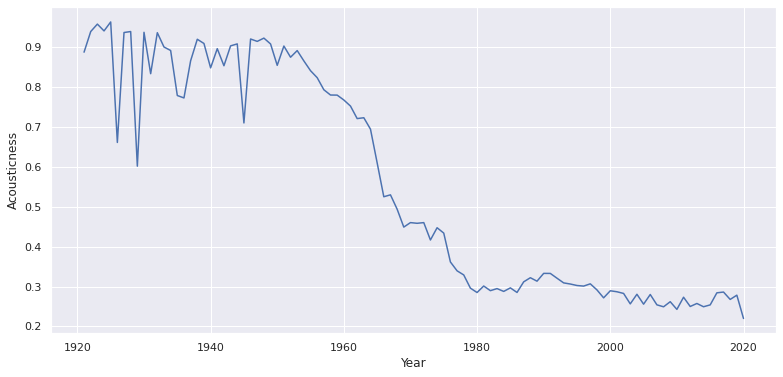

In [55]:
plt.figure(figsize=(13,6))
x = data.groupby('year')['acousticness'].mean()
ax = sns.lineplot(x.index, x)
ax.set_xlabel('Year')
ax.set_ylabel('Acousticness')

### **<font color='green'>It is clearly visible that Acousticness of songs has constantly decreased over the years.</font>**

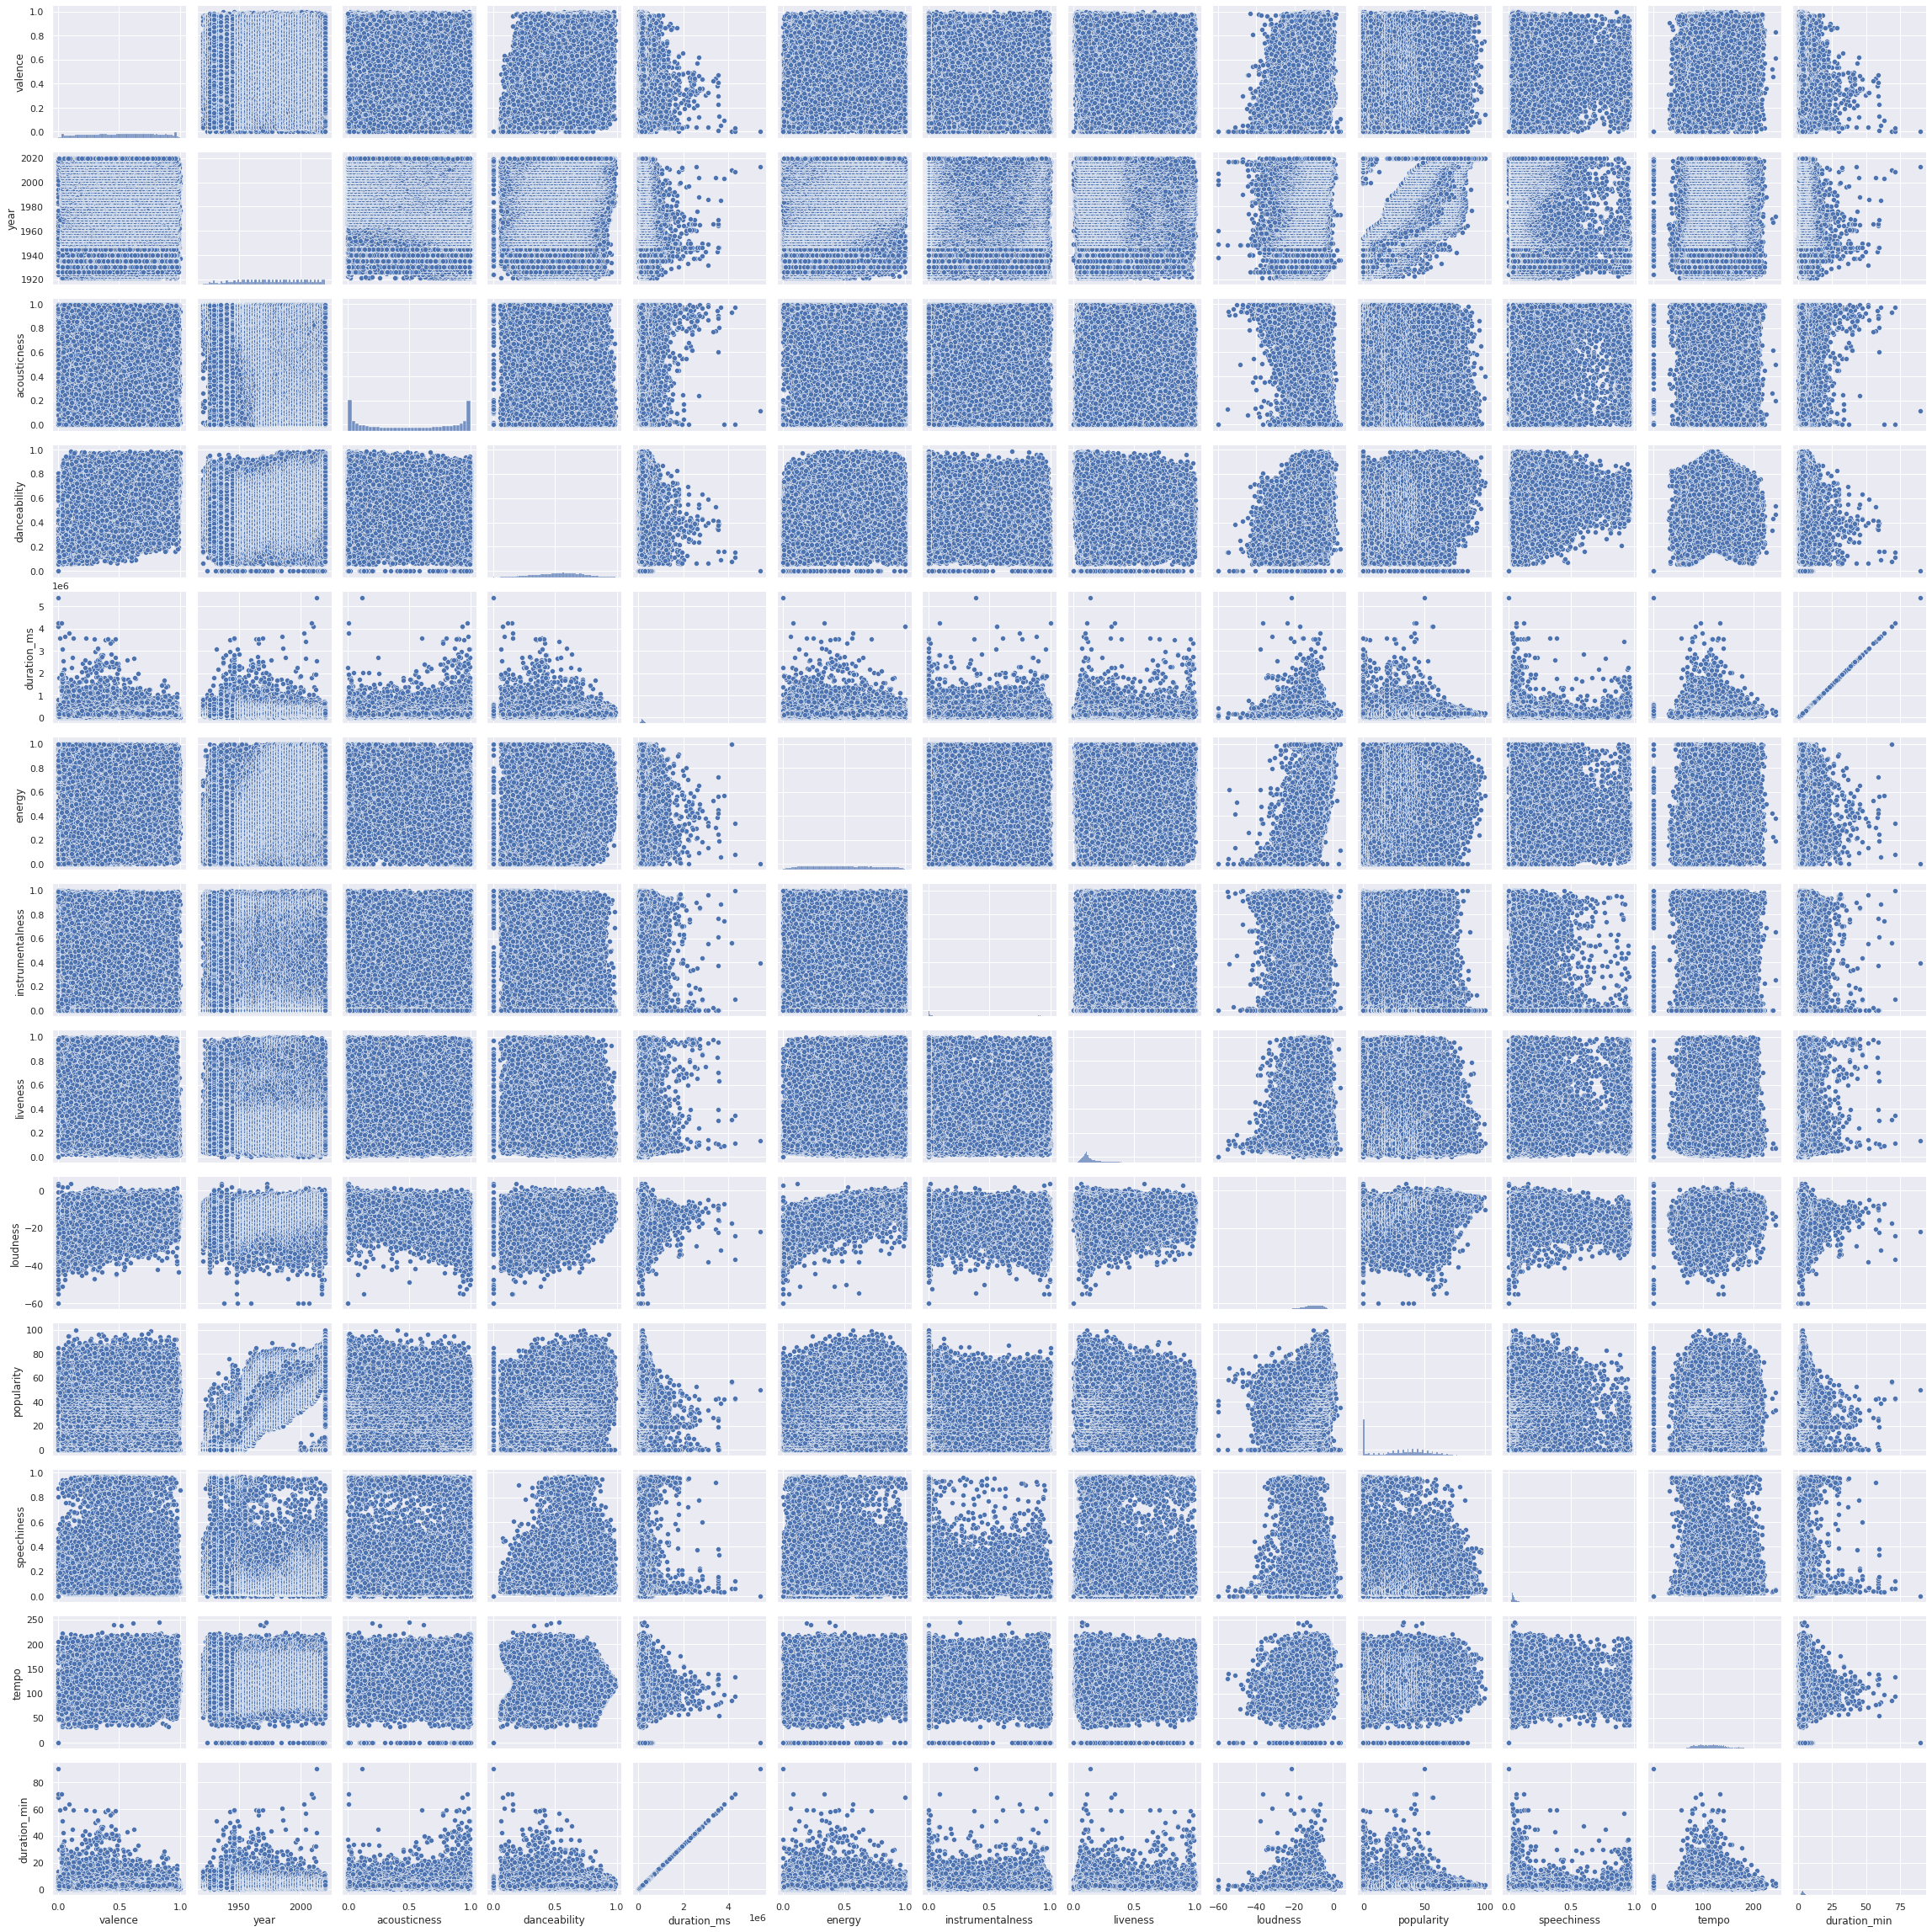

In [56]:
sns.pairplot(data)